In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

In [44]:
df = pd.read_csv("/content/health_lifestyle_dataset-20k.csv")

In [45]:
df.head(10)

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0
5,6,25,Male,27.3,19495,5.0,4.4,1301,0,1,73,107,65,284,0,0
6,7,78,Female,37.1,16739,9.5,4.2,3478,1,0,90,110,102,201,0,0
7,8,38,Female,18.9,1726,4.8,1.7,3212,0,1,64,113,109,197,0,0
8,9,56,Female,18.2,1764,5.1,1.5,3740,0,1,91,112,61,237,1,0
9,10,75,Male,23.5,9730,4.5,0.7,3571,0,1,54,177,90,157,1,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 19999 non-null  int64  
 1   age                19999 non-null  int64  
 2   gender             19999 non-null  object 
 3   bmi                19999 non-null  float64
 4   daily_steps        19999 non-null  int64  
 5   sleep_hours        19999 non-null  float64
 6   water_intake_l     19999 non-null  float64
 7   calories_consumed  19999 non-null  int64  
 8   smoker             19999 non-null  int64  
 9   alcohol            19999 non-null  int64  
 10  resting_hr         19999 non-null  int64  
 11  systolic_bp        19999 non-null  int64  
 12  diastolic_bp       19999 non-null  int64  
 13  cholesterol        19999 non-null  int64  
 14  family_history     19999 non-null  int64  
 15  disease_risk       19999 non-null  int64  
dtypes: float64(3), int64(1

In [47]:
df.shape

(19999, 16)

In [48]:
df.describe()

,id,age,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
count,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000
mean,10000.000000,48.573929,29.000620,10465.640582,6.494190,2.744892,2605.131007,0.201310,0.297365,74.595630,134.558328,89.339867,224.568078,0.300065,0.247862
std,5773.358353,17.892561,6.361803,5496.833926,2.027299,1.300935,807.627411,0.400989,0.457110,14.403746,25.998603,17.440257,43.393545,0.458297,0.431782
min,1.000000,18.000000,18.000000,1000.000000,3.000000,0.500000,1200.000000,0.000000,0.000000,50.000000,90.000000,60.000000,150.000000,0.000000,0.000000
25%,5000.500000,33.000000,23.400000,5669.000000,4.700000,1.600000,1910.000000,0.000000,0.000000,62.000000,112.000000,74.000000,187.000000,0.000000,0.000000
50%,10000.000000,48.000000,29.000000,10407.000000,6.500000,2.700000,2602.000000,0.000000,0.000000,75.000000,135.000000,89.000000,224.000000,0.000000,0.000000
75%,14999.500000,64.000000,34.500000,15263.500000,8.300000,3.900000,3300.000000,0.000000,1.000000,87.000000,157.000000,104.000000,262.000000,1.000000,0.000000
max,19999.000000,79.000000,40.000000,19999.000000,10.000000,5.000000,3999.000000,1.000000,1.000000,99.000000,179.000000,119.000000,299.000000,1.000000,1.000000


In [49]:
df.isnull() .sum()

,0
id,0
age,0
gender,0
bmi,0
daily_steps,0
sleep_hours,0
water_intake_l,0
calories_consumed,0
smoker,0
alcohol,0


In [50]:
df.duplicated() .sum()

np.int64(0)

In [51]:
# Drop columns that are not useful for prediction
df_clean = df.drop(columns=['id'])

# Encode gender (Male=0, Female=1)
df_clean['gender'] = df_clean['gender'].map({'Male': 0, 'Female': 1})

# Check again
df_clean.head()


,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,56,0,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,69,1,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,46,0,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,32,1,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,60,1,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0


In [52]:
df.columns

Index(['id', 'age', 'gender', 'bmi', 'daily_steps', 'sleep_hours',
       'water_intake_l', 'calories_consumed', 'smoker', 'alcohol',
       'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol',
       'family_history', 'disease_risk'],
      dtype='object')

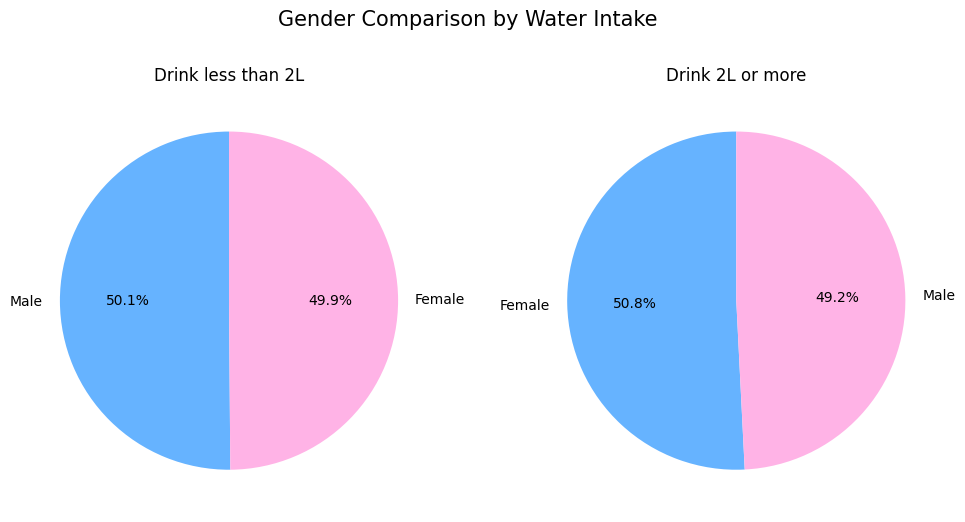

In [53]:
# Split data
low_water = df[df['water_intake_l'] < 2]
high_water = df[df['water_intake_l'] >= 2]

# Calculate gender counts for each group
low_gender = low_water['gender'].value_counts()
high_gender = high_water['gender'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Pie for < 2L
axes[0].pie(
    low_gender,
    labels=low_gender.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff','#ffb3e6']
)
axes[0].set_title('Drink less than 2L')

# Pie for ≥ 2L
axes[1].pie(
    high_gender,
    labels=high_gender.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff','#ffb3e6']
)
axes[1].set_title('Drink 2L or more')

plt.suptitle('Gender Comparison by Water Intake', fontsize=15)
plt.show()


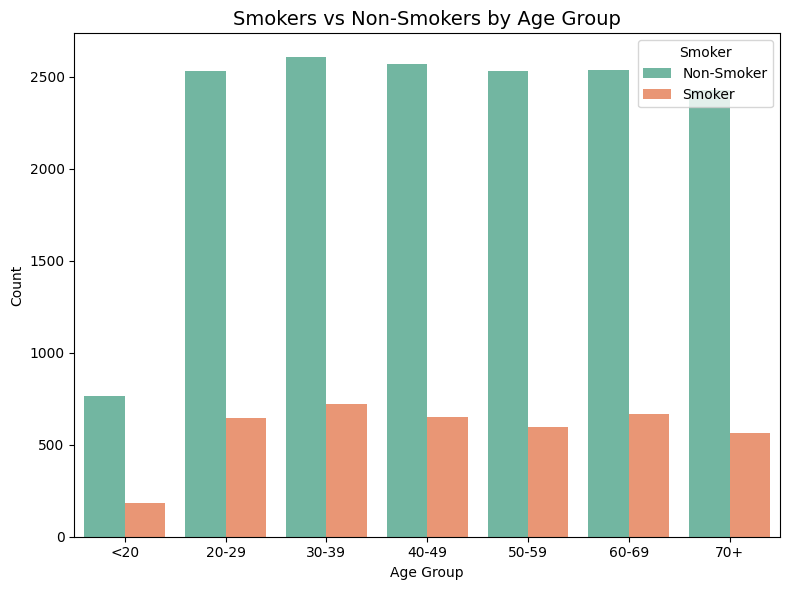

In [54]:
# Create age groups
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 20, 30, 40, 50, 60, 70, 80],
    labels=['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
)

# Plot 1: Smokers vs Non-Smokers by Age Group
plt.figure(figsize=(8,6))
sns.countplot(
    x='age_group',
    hue='smoker',
    data=df,
    palette='Set2'
)
plt.title('Smokers vs Non-Smokers by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.tight_layout()
plt.show()

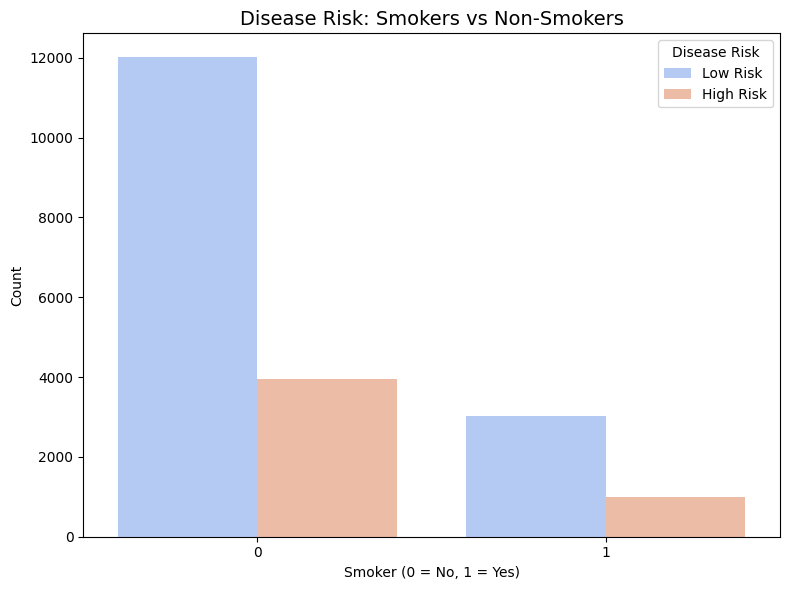

In [55]:
# Plot 2: Disease Risk by Smoking Status
plt.figure(figsize=(8,6))
sns.countplot(
    x='smoker',
    hue='disease_risk',
    data=df,
    palette='coolwarm'
)
plt.title('Disease Risk: Smokers vs Non-Smokers', fontsize=14)
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Disease Risk', labels=['Low Risk', 'High Risk'])
plt.tight_layout()
plt.show()

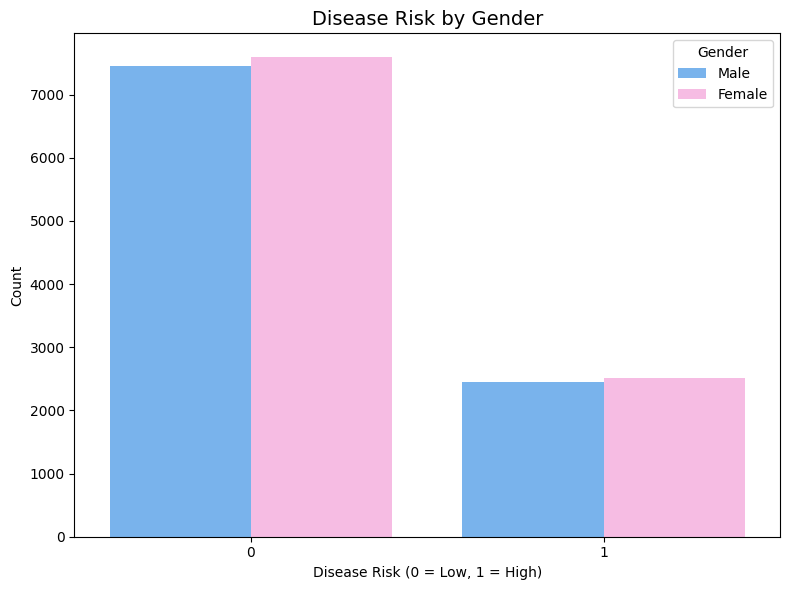

In [56]:
# Define custom colors for genders (same as you requested)
custom_palette = {
    'Male': '#66b3ff',   # blue
    'Female': '#ffb3e6'  # pink
}

plt.figure(figsize=(8,6))
sns.countplot(x='disease_risk', hue='gender', data=df, palette=custom_palette)
plt.title("Disease Risk by Gender", fontsize=14)
plt.xlabel("Disease Risk (0 = Low, 1 = High)")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()
# Disease risk in this dataset was likely calculated based on:
# 1. Body Mass Index (BMI)
# 2. Blood Pressure (Systolic_BP / Diastolic_BP)
# 3. Cholesterol levels
# 4. Family medical history (family_history)
# 5. Lifestyle habits (smoking, walking activity, water intake)


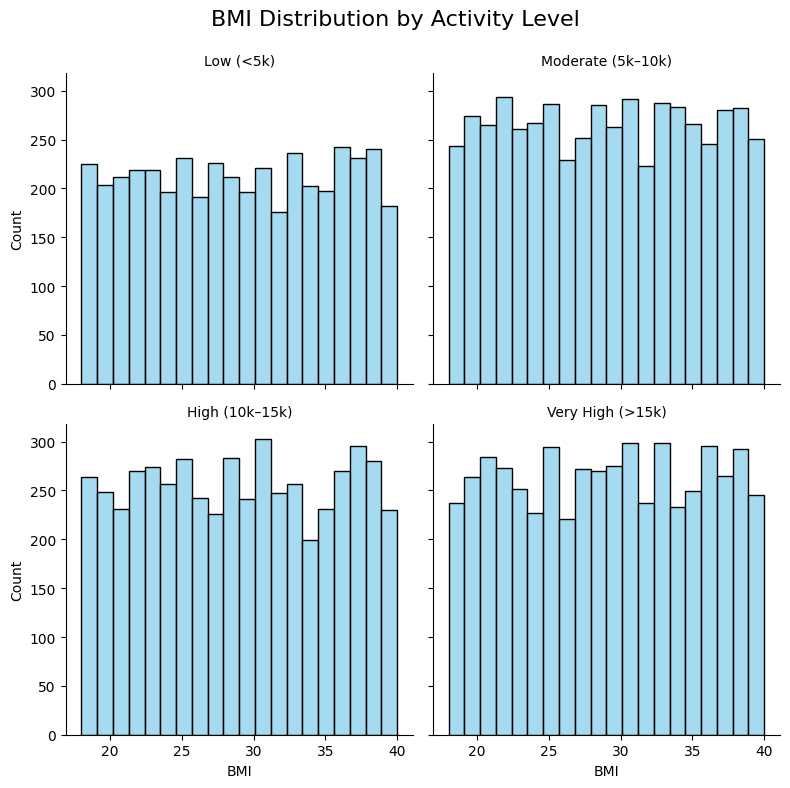

In [57]:
# إعادة تعريف الفئات (لو غير موجودة)
df['activity_level'] = pd.cut(
    df['daily_steps'],
    bins=[0, 5000, 10000, 15000, 20000],
    labels=['Low (<5k)', 'Moderate (5k–10k)', 'High (10k–15k)', 'Very High (>15k)']
)

# رسم منفصل لكل فئة مشي
g = sns.FacetGrid(df, col="activity_level", col_wrap=2, height=4, sharex=True, sharey=True)
g.map(sns.histplot, "bmi", bins=20, color="skyblue", edgecolor="black")
g.set_titles("{col_name}")
g.set_axis_labels("BMI", "Count")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("BMI Distribution by Activity Level", fontsize=16)
plt.show()


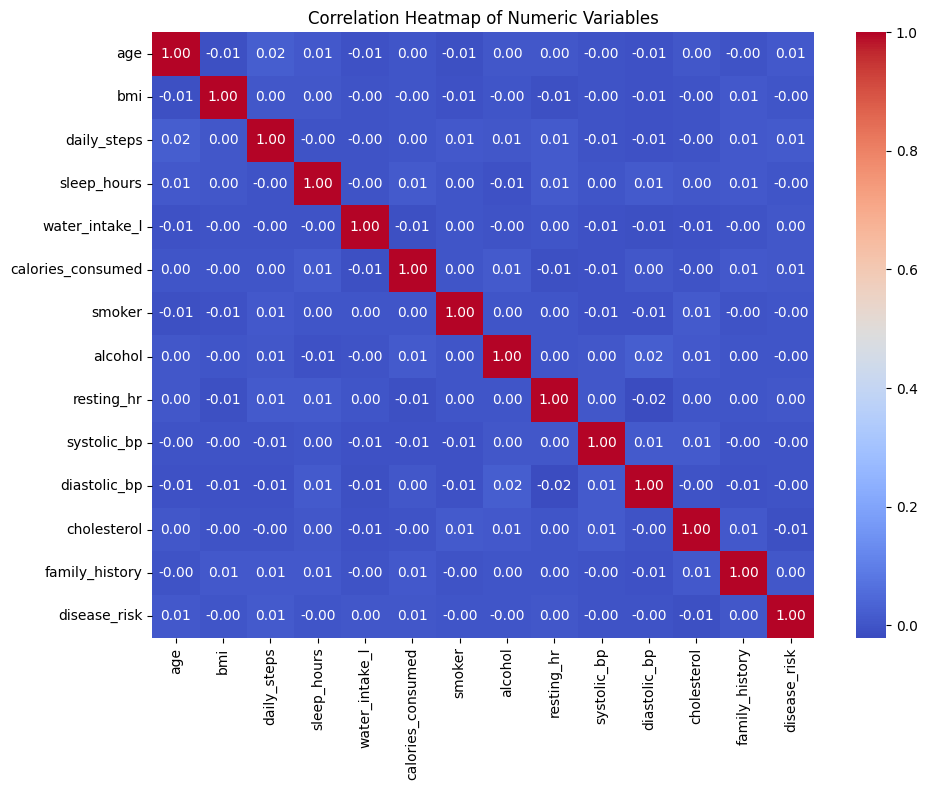

In [58]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Correlation Heatmap - only if there are 4 or more numeric columns
if len(numeric_cols) >= 4:
    numeric_df = df.select_dtypes(include=[np.number])

    # Remove 'id' column if it exists
    if 'id' in numeric_df.columns:
        numeric_df = numeric_df.drop(columns=['id'])

    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Variables')
    plt.tight_layout()
    plt.show()


In [59]:
# Define features (X) and target (y)
X = df_clean.drop(columns=['disease_risk'])
y = df_clean['disease_risk']

# Split the data (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.749

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      2996
           1       0.00      0.00      0.00      1004

    accuracy                           0.75      4000
   macro avg       0.37      0.50      0.43      4000
weighted avg       0.56      0.75      0.64      4000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
#Separate the classes
df_majority = df_clean[df_clean['disease_risk'] == 0]
df_minority = df_clean[df_clean['disease_risk'] == 1]

#Upsample the minority class to balance the data
df_minority_upsampled = resample(
    df_minority,
    replace=True,     # sample with replacement
    n_samples=len(df_majority),  # match majority size
    random_state=42
)

# Combine back
df_balanced = pd.concat([df_majority, df_minority_upsampled])

print("Balanced dataset shape:")
print(df_balanced['disease_risk'].value_counts())

# Split features and target
X = df_balanced.drop(columns=['disease_risk'])
y = df_balanced['disease_risk']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split and retrain model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluate again
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Balanced dataset shape:
disease_risk
0    15042
1    15042
Name: count, dtype: int64
Accuracy: 0.5009140767824497

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.46      0.48      3044
           1       0.50      0.55      0.52      2973

    accuracy                           0.50      6017
   macro avg       0.50      0.50      0.50      6017
weighted avg       0.50      0.50      0.50      6017



In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [63]:
X = df_clean.drop(columns=['disease_risk'])
y = df_clean['disease_risk']

In [64]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [65]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [66]:

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [67]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.749

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      2996
           1       0.00      0.00      0.00      1004

    accuracy                           0.75      4000
   macro avg       0.37      0.50      0.43      4000
weighted avg       0.56      0.75      0.64      4000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, uniform

# نحدد النموذج الأساسي
rf = RandomForestClassifier(random_state=42)

#  نحدد شبكة المعلمات اللي نبي نجربها مع توزيع عشوائي
param_dist = {
    'n_estimators': randint(200, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

#  نعمل RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=50, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)

#  ندربه على بيانات التدريب
random_search.fit(X_train, y_train)

#  أفضل معلمات
print("Best parameters:", random_search.best_params_)

#  تقييم النموذج على بيانات الاختبار
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Accuracy after tuning:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [69]:
!pip install pandas scikit-learn lightgbm imbalanced-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, make_scorer
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define features (X) and target (y) using the cleaned dataframe
X = df_clean.drop(columns=['disease_risk'])
y = df_clean['disease_risk']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the original dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the balanced data (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
#  the hyperparameter distribution for LightGBM
param_dist_lgbm = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),
    'num_leaves': randint(20, 60),
    'max_depth': randint(3, 15),
    'min_child_samples': randint(20, 100),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
}

#  LGBMClassifier model
lgbm = LGBMClassifier(random_state=42)

# Define an appropriate scoring metric for imbalanced data (e.g., F1-score)
f1_scorer = make_scorer(f1_score)

#RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(estimator=lgbm, param_distributions=param_dist_lgbm,
                                        n_iter=50, cv=5, n_jobs=-1, scoring=f1_scorer, random_state=42)

#Fit the RandomizedSearchCV object to the scaled and balanced training data
random_search_lgbm.fit(X_train, y_train)

#Print the best parameters found
print("Best parameters (LightGBM):", random_search_lgbm.best_params_)

# Access the best estimator
best_lgbm_model = random_search_lgbm.best_estimator_

#Evaluate the best model on the test set
y_pred_best_lgbm = best_lgbm_model.predict(X_test)

print("\nTuned LightGBM Model Performance (Balanced Data):")
print("Accuracy:", accuracy_score(y_test, y_pred_best_lgbm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_lgbm))

[LightGBM] [Info] Number of positive: 12030, number of negative: 12037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1666
[LightGBM] [Info] Number of data points in the train set: 24067, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499855 -> initscore=-0.000582
[LightGBM] [Info] Start training from score -0.000582
Best parameters (LightGBM): {'colsample_bytree': np.float64(0.8684574067296202), 'learning_rate': np.float64(0.11759403438884916), 'max_depth': 13, 'min_child_samples': 21, 'n_estimators': 372, 'num_leaves': 59, 'subsample': np.float64(0.8788062963981071)}

Tuned LightGBM Model Performance (Balanced Data):
Accuracy: 0.8105368123649659

Classification Report:
               precision    recall  f1-score   support

           0       0.75  

In [70]:
# بيانات جديدة للاختبار (بدون العمود المستهدف)
new_data = pd.DataFrame({
    'age': [30],
    'gender': [1],  # Female
    'bmi': [22.5],
    'daily_steps': [8000],
    'sleep_hours': [7],
    'calories_consumed': [2000],
    'family_history': [1],
    'smoker': [0],
    'resting_hr': [70],
    'water_intake_l': [2.5],
    'systolic_bp': [120],
    'diastolic_bp': [80],
    'cholesterol': [180],
    'alcohol': [0]
})

# توقع التصنيف
prediction = best_lgbm_model.predict(new_data)

# توقع الاحتمالات
prediction_proba = best_lgbm_model.predict_proba(new_data)

# طباعة النتيجة مع الاحتمال
for i in range(len(new_data)):
    print(f"Predicted class: {prediction[i]} | Probability: {prediction_proba[i][prediction[i]]:.2f}")

Predicted class: 0 | Probability: 0.89


In [71]:
new_data = pd.DataFrame({
    'age': [60],
    'gender': [0],  # Male
    'bmi': [32.5],
    'daily_steps': [2000],
    'sleep_hours': [5],
    'calories_consumed': [3000],
    'family_history': [1],
    'smoker': [1],
    'resting_hr': [90],
    'water_intake_l': [1.2],
    'systolic_bp': [150],
    'diastolic_bp': [95],
    'cholesterol': [250],
    'alcohol': [1]
})

prediction = best_lgbm_model.predict(new_data)
prediction_proba = best_lgbm_model.predict_proba(new_data)

print(f"Predicted class: {prediction[0]} | Probability: {prediction_proba[0][prediction[0]]:.2f}")

Predicted class: 0 | Probability: 0.88


In [72]:
from rich.console import Console
from rich.table import Table
import pandas as pd

console = Console()

# Very critical case data (elderly male, obesity, high blood pressure, smoking)
high_risk_data = pd.DataFrame({
    'age': [72],
    'gender': [0],  # Male
    'bmi': [39.5],
    'daily_steps': [800],
    'sleep_hours': [4],
    'calories_consumed': [3600],
    'family_history': [1],
    'smoker': [1],
    'resting_hr': [105],
    'water_intake_l': [0.8],
    'systolic_bp': [170],
    'diastolic_bp': [110],
    'cholesterol': [290],
    'alcohol': [1]
})

# Prediction
pred = best_lgbm_model.predict(high_risk_data)[0]
proba = best_lgbm_model.predict_proba(high_risk_data)[0][pred]

# Display the result
table = Table(title=" Health Risk Prediction - Critical Male Case", title_style="bold red")

table.add_column("Feature", style="bright_cyan")
table.add_column("Value", style="white")
for col in high_risk_data.columns:
    table.add_row(col, str(high_risk_data[col].values[0]))

console.print(table)
console.print(f"\n[bold yellow]Predicted Class:[/bold yellow] {'Low Risk 🟢' if pred == 0 else 'High Risk 🔴'}")
console.print(f"[bold yellow]Confidence:[/bold yellow] {proba:.2f}\n")

   Health Risk Prediction -  
     Critical Male Case      
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Feature           ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ age               │ 72    │
│ gender            │ 0     │
│ bmi               │ 39.5  │
│ daily_steps       │ 800   │
│ sleep_hours       │ 4     │
│ calories_consumed │ 3600  │
│ family_history    │ 1     │
│ smoker            │ 1     │
│ resting_hr        │ 105   │
│ water_intake_l    │ 0.8   │
│ systolic_bp       │ 170   │
│ diastolic_bp      │ 110   │
│ cholesterol       │ 290   │
│ alcohol           │ 1     │
└───────────────────┴───────┘

Predicted Class: High Risk 🔴

Confidence: 0.76

In [73]:
console = Console()

# بيانات صحية (قيمة مثالية لمخرجات جميلة)
healthy_data = pd.DataFrame({
    'age': [25],
    'gender': [1],  # Female
    'bmi': [20.5],
    'daily_steps': [12000],
    'sleep_hours': [8.5],
    'calories_consumed': [2000],
    'family_history': [0],
    'smoker': [0],
    'resting_hr': [60],
    'water_intake_l': [3.5],
    'systolic_bp': [110],
    'diastolic_bp': [70],
    'cholesterol': [155],
    'alcohol': [0]
})

# التوقع
pred = best_lgbm_model.predict(healthy_data)[0]
proba = best_lgbm_model.predict_proba(healthy_data)[0][pred]

# عرض النتيجة
table = Table(title="Health Risk Prediction - Ideal Healthy Case", title_style="bold green")

table.add_column("Feature", style="cyan")
table.add_column("Value", style="white")

for col in healthy_data.columns:
    table.add_row(col, str(healthy_data[col].values[0]))

console.print(table)
console.print(f"\n[bold yellow]Predicted Class:[/bold yellow] {'Low Risk 🟢' if pred == 0 else 'High Risk 🔴'}")
console.print(f"[bold yellow]Confidence:[/bold yellow] {proba:.2f}\n")

  Health Risk Prediction -   
     Ideal Healthy Case      
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Feature           ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ age               │ 25    │
│ gender            │ 1     │
│ bmi               │ 20.5  │
│ daily_steps       │ 12000 │
│ sleep_hours       │ 8.5   │
│ calories_consumed │ 2000  │
│ family_history    │ 0     │
│ smoker            │ 0     │
│ resting_hr        │ 60    │
│ water_intake_l    │ 3.5   │
│ systolic_bp       │ 110   │
│ diastolic_bp      │ 70    │
│ cholesterol       │ 155   │
│ alcohol           │ 0     │
└───────────────────┴───────┘

Predicted Class: Low Risk 🟢

Confidence: 0.98

In [74]:
console = Console()

# بيانات حالة حرجة جدًا (رجل كبير في السن، سمنة مفرطة، ضغط وكولسترول مرتفع، تدخين وكحول)
high_risk_data = pd.DataFrame({
    'age': [80],
    'gender': [0],  # Male
    'bmi': [42.3],
    'daily_steps': [500],
    'sleep_hours': [3],
    'calories_consumed': [4200],
    'family_history': [1],
    'smoker': [1],
    'resting_hr': [115],
    'water_intake_l': [0.5],
    'systolic_bp': [185],
    'diastolic_bp': [120],
    'cholesterol': [330],
    'alcohol': [1]
})

# التوقع
pred = best_lgbm_model.predict(high_risk_data)[0]
proba = best_lgbm_model.predict_proba(high_risk_data)[0][pred]

# عرض النتيجة
table = Table(title="Health Risk Prediction - Critical Male Case", title_style="bold red")

table.add_column("Feature", style="bright_cyan")
table.add_column("Value", style="white")

for col in high_risk_data.columns:
    table.add_row(col, str(high_risk_data[col].values[0]))

console.print(table)
console.print(f"\n[bold yellow]Predicted Class:[/bold yellow] {'Low Risk 🟢' if pred == 0 else 'High Risk 🔴'}")
console.print(f"[bold yellow]Confidence:[/bold yellow] {proba:.2f}\n")

  Health Risk Prediction -   
     Critical Male Case      
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Feature           ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ age               │ 80    │
│ gender            │ 0     │
│ bmi               │ 42.3  │
│ daily_steps       │ 500   │
│ sleep_hours       │ 3     │
│ calories_consumed │ 4200  │
│ family_history    │ 1     │
│ smoker            │ 1     │
│ resting_hr        │ 115   │
│ water_intake_l    │ 0.5   │
│ systolic_bp       │ 185   │
│ diastolic_bp      │ 120   │
│ cholesterol       │ 330   │
│ alcohol           │ 1     │
└───────────────────┴───────┘

Predicted Class: High Risk 🔴

Confidence: 0.55